In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
#fundamental libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import warnings

#Keras libraries

from keras.layers import Dense,LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go


warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore')
print("##################################")
print("Importing all required libraries")
print("##################################")

##################################
Importing all required libraries
##################################


In [217]:
print("#####################################")
print("loading data from drive successfully")
print("####################################")
df_diesel_price = pd.read_csv('/content/drive/MyDrive/diesel_price.csv')

#####################################
loading data from drive successfully
####################################


In [219]:
df_diesel_price.head()

,Sale_Date,Diesel_price
0,2022-04-16,3.65
1,2022-04-17,3.95
2,2022-04-18,3.86
3,2022-04-18,4.06
4,2022-04-21,3.83


In [69]:
df_diesel_price.size

200

##################################
Line Pollting the Diesel price
##################################


Text(0.5, 1.0, 'Day vs Diesel Price')

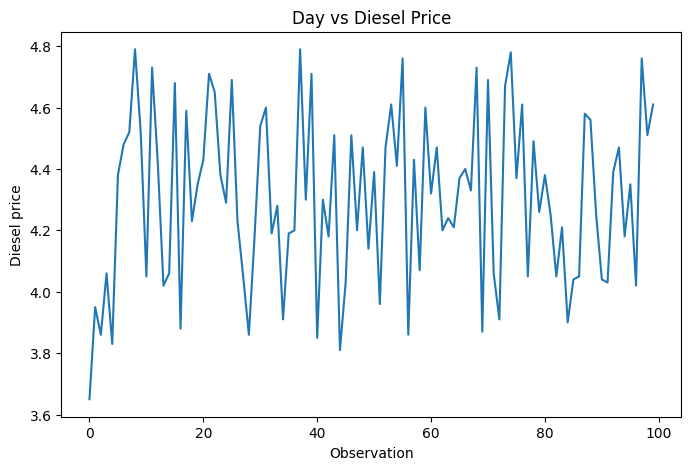

In [220]:
print("##################################")
print("Line Pollting the Diesel price")
print("##################################")
plt.figure(figsize=(8,5))
plt.plot(df_diesel_price["Diesel_price"])
plt.xlabel('Observation')
plt.ylabel('Diesel price')
plt.title('Day vs Diesel Price')

In [71]:
df_diesel_price["Diesel_price"].size

100

In [221]:
print("##################################")
print("        Diesel Dataset Split      ")
print("##################################")
train_ds = df_diesel_price["Diesel_price"].iloc[0:50].values
test_ds = df_diesel_price["Diesel_price"].iloc[50:100].values

##################################
        Diesel Dataset Split      
##################################


In [156]:
train_ds.size

50

In [222]:
train_ds

array([3.65, 3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05,
       4.73, 4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71,
       4.65, 4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19,
       4.28, 3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51,
       3.81, 4.03, 4.51, 4.2 , 4.47, 4.14])

In [223]:
test_ds

array([4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 , 4.32,
       4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69, 4.06,
       3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25, 4.05,
       4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39, 4.47,
       4.18, 4.35, 4.02, 4.76, 4.51, 4.61])

In [224]:
test_ds.size

50

In [259]:
print("########################################################################")
print("        For Model build X_train,Y_train,X_test and Y_test               ")
print("########################################################################")
X_train = train_ds[:-1]
y_train = train_ds[1:]
X_test = test_ds[:-1]
y_test = test_ds[1:]




########################################################################
        For Model build X_train,Y_train,X_test and Y_test               
########################################################################


In [226]:
print("X_train")
X_train

X_train


array([3.65, 3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05,
       4.73, 4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71,
       4.65, 4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19,
       4.28, 3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51,
       3.81, 4.03, 4.51, 4.2 , 4.47])

In [227]:
print("Y_train")
y_train

Y_train


array([3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05, 4.73,
       4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71, 4.65,
       4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19, 4.28,
       3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51, 3.81,
       4.03, 4.51, 4.2 , 4.47, 4.14])

In [228]:
print("X_test")
X_test

X_test


array([4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 , 4.32,
       4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69, 4.06,
       3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25, 4.05,
       4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39, 4.47,
       4.18, 4.35, 4.02, 4.76, 4.51])

In [229]:
print("Y_test")
y_test

Y_test


array([3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 , 4.32, 4.47,
       4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69, 4.06, 3.91,
       4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25, 4.05, 4.21,
       3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39, 4.47, 4.18,
       4.35, 4.02, 4.76, 4.51, 4.61])

In [174]:
y_test.size


49

In [175]:
y_train.size

49

In [176]:
X_train.size

49

In [177]:
X_test.size

49

In [252]:
print("##########################################################")
print("        Model build using various parameters              ")
print("##########################################################")
rnnmodel = Sequential()
rnnmodel.add(LSTM(5,activation = 'tanh',input_shape = (1,1),recurrent_activation= 'hard_sigmoid'))
rnnmodel.add(Dense(1))
rnnmodel.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
rnnmodel.summary()

##########################################################
        Model build using various parameters              
##########################################################
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 5)                 140       
                                                                 
 dense_22 (Dense)            (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [257]:
print("########################################")
print("        Fitting the Model               ")
print("########################################")
rnnmodel.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=100)

########################################
        Fitting the Model               
########################################
Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 7.7123 - mean_absolute_error: 2.7643
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 7.6375 - mean_absolute_error: 2.7507
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5630 - mean_absolute_error: 2.7371
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 7.4887 - mean_absolute_error: 2.7236
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 7.4144 - mean_absolute_error: 2.7098
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 7.3409 - mean_absolute_error: 2.6962
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 7.2671 - mean_absolute_error: 2.6826
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 7.1934 - mean_absolute_error: 2.6687
Epoch

In [267]:
print("#############################################")
print("         Model Predition process             ")
print("#############################################")
y_pred_test_nn = model.predict(X_test)
y_train_pred_nn = model.predict(X_train)
print("R Square score (Train set):\t{:0.2f}".format(r2_score(y_train, y_train_pred_nn)))
print("R Square (Test set):\t{:0.2f}".format(r2_score(y_test, y_pred_test_nn)))
print("#############################################")

#############################################
         Model Predition process             
#############################################
2/2 [==============================] - 0s 5ms/step
R Square score (Train set):	-0.85
R Square (Test set):	-1.21
#############################################


In [261]:
import tensorflow as tf

In [268]:
test_mse = model.evaluate(X_test, y_test, batch_size=1)
#lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print("############################################################")
print("        Model Evaluation process (ANN and LSTM)             ")
print("###########################################################")
print('ANN: %f',rnntest_mse)
#print('LSTM: %f'%lstm_test_mse)
print("###########################################################")

49/49 [==============================] - 0s 2ms/step - loss: 0.3066 - mae: 0.3066
############################################################
        Model Evaluation process (ANN and LSTM)             
###########################################################
ANN: %f [0.3065764307975769, 0.3065764307975769]
###########################################################


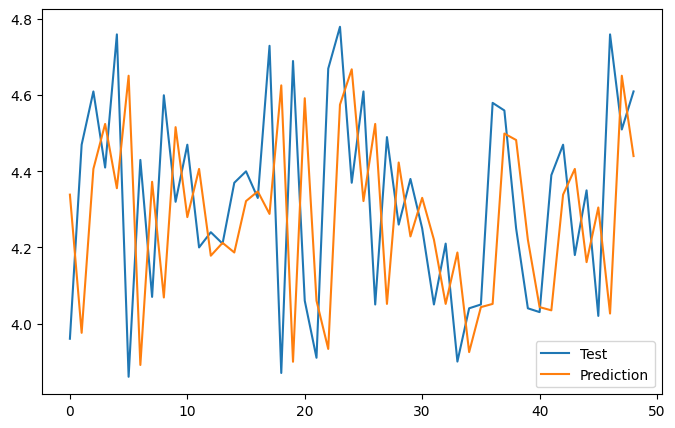

In [241]:
plt.figure(figsize=(8,5))
plt.plot(y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()